In [1]:
import pandas as pd

In [2]:
%%bash 
wget https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P6-donnees.zip
unzip DAN-P6-donnees.zip


Archive:  DAN-P6-donnees.zip
   creating: DAN-P6-donnees/
  inflating: __MACOSX/._DAN-P6-donnees  
  inflating: DAN-P6-donnees/customers.csv  
  inflating: __MACOSX/DAN-P6-donnees/._customers.csv  
  inflating: DAN-P6-donnees/products.csv  
  inflating: __MACOSX/DAN-P6-donnees/._products.csv  
  inflating: DAN-P6-donnees/transactions.csv  
  inflating: __MACOSX/DAN-P6-donnees/._transactions.csv  


--2022-10-16 15:42:38--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P6-donnees.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.90.251
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.90.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13345644 (13M) [application/zip]
Saving to: ‘DAN-P6-donnees.zip’

     0K .......... .......... .......... .......... ..........  0%  364K 36s
    50K .......... .......... .......... .......... ..........  0%  367K 35s
   100K .......... .......... .......... .......... ..........  1%  368K 35s
   150K .......... .......... .......... .......... ..........  1% 33.8M 26s
   200K .......... .......... .......... .......... ..........  1%  179M 21s
   250K .......... .......... .......... .......... ..........  2%  368K 23s
   300K .......... .......... .......... .......... ..........  2% 37.0M 20s
   350K .....

# Nettoyage

# **Transactions**

In [ ]:
transactions = pd.read_csv('DAN-P6-donnees/transactions.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# On constate que "Dtype" > date est en object et non en datetime
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [ ]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [ ]:
# L'information la plus importante ici est la date, nous allons donc vérifier cette colonne
# Identifier les lignes avec Test
transactions[transactions.date.str.startswith('test_')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [ ]:
#Nettoyer les lignes "test_"
df_transactions = transactions[~transactions.date.str.startswith('test_')]

In [ ]:
# Vérification des lignes = nous identifions si il y a encore les chaînes de caractères "test_"
df_transactions.tail()

,id_prod,date,session_id,client_id
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227
679531,1_523,2022-09-28 01:12:01.973763,s_274568,c_3873


In [ ]:
# Vérification des lignes T_0 > aucune
Verification_T_0 = df_transactions[df_transactions['id_prod'] == 'T_0']
print(Verification_T_0)

Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


In [ ]:
# Ajout d'une date au format %Y-%m-%d
df_transactions['date_new'] = df_transactions['date'].str.slice(0, 10)
df_transactions.insert(1, 'date_time', pd.to_datetime(df_transactions['date_new'], format='%Y-%m-%d'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Diviser le "date_new" par year, month et day
df_transactions['date_new_year'] = df_transactions['date_new'].str.slice(stop=4)
df_transactions['date_new_month'] = df_transactions['date_new'].str.slice(start=5, stop=7)
df_transactions['date_new_day'] = df_transactions['date_new'].str.slice(start=8)
df_transactions.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id_prod,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day
0,0_1518,2022-05-20,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,05,20
1,1_251,2022-02-02,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,02,02
2,0_1277,2022-06-18,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,06,18
3,2_209,2021-06-24,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,06,24
4,0_1509,2023-01-11,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,01,11


In [ ]:
# Les dates sont toujours en object
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_prod         679332 non-null  object        
 1   date_time       679332 non-null  datetime64[ns]
 2   date            679332 non-null  object        
 3   session_id      679332 non-null  object        
 4   client_id       679332 non-null  object        
 5   date_new        679332 non-null  object        
 6   date_new_year   679332 non-null  object        
 7   date_new_month  679332 non-null  object        
 8   date_new_day    679332 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 51.8+ MB


In [ ]:
# Trier par date_new
df_transactions.sort_values(by="date_new", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_transactions.head()

,id_prod,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day
367642,0_1682,2021-03-01,2021-03-01 21:50:43.479719,s_451,c_2187,2021-03-01,2021,03,01
615460,0_1115,2021-03-01,2021-03-01 06:43:40.590384,s_134,c_7575,2021-03-01,2021,03,01
301505,0_1434,2021-03-01,2021-03-01 10:14:21.593374,s_206,c_226,2021-03-01,2021,03,01
561805,2_43,2021-03-01,2021-03-01 21:11:16.391272,s_437,c_7563,2021-03-01,2021,03,01
438763,1_631,2021-03-01,2021-03-01 05:43:45.601513,s_127,c_8607,2021-03-01,2021,03,01


In [ ]:
# Transformer nouvelle date "année" en format numérique
df_transactions['date_new_year_time'] = pd.to_numeric(df_transactions['date_new_year'], errors='coerce')
df_transactions.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 367642 to 356745
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_prod             679332 non-null  object        
 1   date_time           679332 non-null  datetime64[ns]
 2   date                679332 non-null  object        
 3   session_id          679332 non-null  object        
 4   client_id           679332 non-null  object        
 5   date_new            679332 non-null  object        
 6   date_new_year       679332 non-null  object        
 7   date_new_month      679332 non-null  object        
 8   date_new_day        679332 non-null  object        
 9   date_new_year_time  679332 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 57.0+ MB


# **Products**

In [ ]:
products = pd.read_csv('DAN-P6-donnees/products.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [ ]:
# L'information la plus important ici est le prix 
# Nous allons donc rechercher des outliers 

# Recherche du plus bas prix et du plus haut prix 
products_lower = products.price.sort_values().iloc[0]
products_max = products.price.sort_values().iloc[-1]

print(f"""
Lower price: {products_lower}
Max price: {products_max}

""")


Lower price: -1.0
Max price: 300.0




In [ ]:
# Rechercher l'id_prod avec le prix le plus bas (outlier)
display(products)
print("")
print("outlier price:")
display(products.query("price <= 0"))

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1



outlier price:


,id_prod,price,categ
731,T_0,-1.0,0


In [ ]:
# Rechercher des données NULL
products.isnull()

,id_prod,price,categ
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3282,False,False,False
3283,False,False,False
3284,False,False,False
3285,False,False,False


In [ ]:
# Les supprimer au cas où...
products.dropna()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [ ]:
# Rechercher des doublons
products.duplicated('id_prod').sum()

0

# **Customers**

In [ ]:
customers = pd.read_csv('DAN-P6-donnees/customers.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
customers.head(10)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [ ]:
# Rechercher des données NULL
customers.isnull()

,client_id,sex,birth
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8618,False,False,False
8619,False,False,False
8620,False,False,False
8621,False,False,False


In [ ]:
# Les supprimer au cas où...
customers.dropna()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [ ]:
# Rechercher des doublons
customers.duplicated('client_id').sum()

0

# **Merge**

In [ ]:
# Test du merge left
merge_left = pd.merge(products, df_transactions, on='id_prod', how='left')

# Verifier si des transactions ne se sont pas join
len_null_rows = len(merge_left[merge_left.isnull().any(axis=1)])
print(f"Nombre de lignes qui n'ont aucune valeur: {len_null_rows}")

# Verifier les produits qui ne se sont pas join
len_null_products = len(merge_left[merge_left.isnull().any(axis=1)]['id_prod'].drop_duplicates())
print(f"Nombre de produits qui n'ont aucune valeur:{len_null_rows}")

the_product = merge_left[merge_left.isnull().any(axis=1)]['id_prod'].drop_duplicates().iloc[0]
print(f"Le produit est: {the_product}")

Nombre de lignes qui n'ont aucune valeur: 22
Nombre de produits qui n'ont aucune valeur:22
Le produit est: 0_1016


In [ ]:
# Merge définitif
merge_final = pd.merge(products, df_transactions, on='id_prod', how='inner')
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_prod             679111 non-null  object        
 1   price               679111 non-null  float64       
 2   categ               679111 non-null  int64         
 3   date_time           679111 non-null  datetime64[ns]
 4   date                679111 non-null  object        
 5   session_id          679111 non-null  object        
 6   client_id           679111 non-null  object        
 7   date_new            679111 non-null  object        
 8   date_new_year       679111 non-null  object        
 9   date_new_month      679111 non-null  object        
 10  date_new_day        679111 non-null  object        
 11  date_new_year_time  679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 67.4+ MB


In [ ]:
librairie = pd.merge(merge_final, customers, on='client_id', how='inner')
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936


In [ ]:
librairie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id_prod             679111 non-null  object        
 1   price               679111 non-null  float64       
 2   categ               679111 non-null  int64         
 3   date_time           679111 non-null  datetime64[ns]
 4   date                679111 non-null  object        
 5   session_id          679111 non-null  object        
 6   client_id           679111 non-null  object        
 7   date_new            679111 non-null  object        
 8   date_new_year       679111 non-null  object        
 9   date_new_month      679111 non-null  object        
 10  date_new_day        679111 non-null  object        
 11  date_new_year_time  679111 non-null  int64         
 12  sex                 679111 non-null  object        
 13  birth               679111 no

# **PART 1 : Analyse univariée**

# **Demandes de d'Antoine**

### **Chiffre d'affaires**

In [ ]:
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936


In [ ]:
CA_total = librairie['price'].sum()
print(f"Le chiffre d'affaires total s’élève à : {CA_total:,.0f}€")

Le chiffre d'affaires total s’élève à : 11,853,729€


In [ ]:
# Répartion du chiffre d'affaires par jour
CA_evol_jour = librairie.groupby([pd.Grouper(key='date_time', freq='D')]).agg({'price':sum}).reset_index()
CA_evol_jour.head()

,date_time,price
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


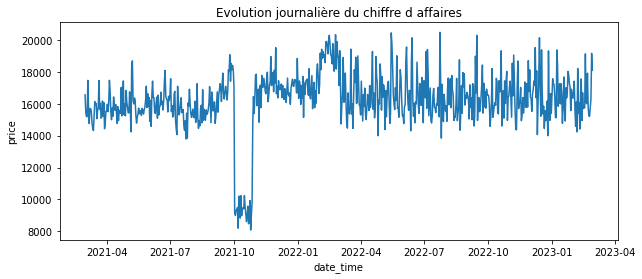

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize=(10,4))
plt.title('Evolution journalière du chiffre d affaires')
sns.lineplot(data = CA_evol_jour, x = CA_evol_jour.date_time, y = CA_evol_jour.price)

In [ ]:
# Répartition du chiffre d'affaires par mois
CA_evol_mois = librairie.groupby([pd.Grouper(key='date_time', freq='M')]).agg({'price':sum}).reset_index()
CA_evol_mois.head()

,date_time,price
0,2021-03-31,482440.61
1,2021-04-30,476109.30
2,2021-05-31,492943.47
3,2021-06-30,484088.56
4,2021-07-31,482835.40


In [ ]:
#Répartition du chiffre d'affaires par mois (fréquence par mois depuis le début de mois) maus avec la fonction resample
#Exemple
#CA_mois = librairie.resample('M', on='date_time').price.sum()
#CA_mois.head()

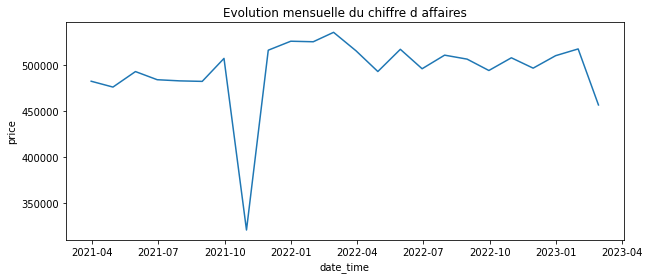

In [ ]:
# Courbe représentant l'évolution du chiffre d'affaires par mois --> "trou" vers octobre 2021.
import seaborn as sns
plt.figure (figsize=(10,4))
plt.title('Evolution mensuelle du chiffre d affaires')
sns.lineplot(data = CA_evol_mois, x = CA_evol_mois.date_time, y = CA_evol_mois.price)

In [ ]:
# Chiffre d'affaires uniquement sur le mois d'octobre = RIEN (erreur technique >> avertir)
test_CA_octobre = librairie[librairie['date_new'] == '2021-10']
test_CA_octobre.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth


In [ ]:
# Nous allons créer un autre df sans octobre pour ne pas fausser les analyses
CA_mois_sans_oct = CA_evol_mois[(CA_evol_mois['date_time'] > '2021-10-31') | (CA_evol_mois['date_time'] < '2021-10-01')]

Evolution du CA (sans octobre)


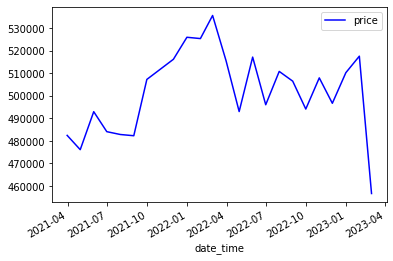

In [ ]:
# Courbe représentant l'évolution du chiffre d'affaires par mois sans octobre
CA_mois_sans_oct.plot(kind='line', x ='date_time', y = 'price', color = 'blue')
print('Evolution du CA (sans octobre)')
plt.show()

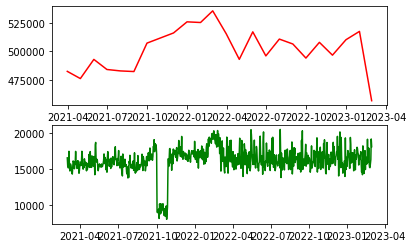

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.plot(CA_mois_sans_oct.date_time,CA_mois_sans_oct.price,c="red")
ax = fig.add_subplot(212)
plt.plot(CA_evol_jour.date_time,CA_evol_jour.price,c="green")
plt.show()

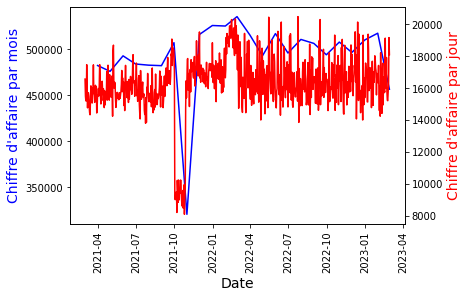

In [ ]:
# Superposition des courbes evolution CA jour & evolution CA mois
fig,ax = plt.subplots()
ax.plot(CA_evol_mois.date_time, CA_evol_mois.price, color="blue")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Chiffre d'affaire par mois",color="blue",fontsize=14)
plt.xticks(rotation=90)
ax2=ax.twinx()


ax2.plot(CA_evol_jour.date_time, CA_evol_jour.price, color="red")
ax2.set_xlabel("Mean",fontsize=14)
ax2.set_ylabel("Chiffre d'affaire par jour",color="red",fontsize=14)

plt.show()

In [ ]:
# Calcul de la Moyenne mobile trismestriel
CA_mois_sans_oct['mean_3'] = CA_mois_sans_oct['price'].rolling(3).mean()
CA_mois_sans_oct.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_time,price,mean_3
0,2021-03-31,482440.61,NaN
1,2021-04-30,476109.30,NaN
2,2021-05-31,492943.47,483831.126667
3,2021-06-30,484088.56,484380.443333
4,2021-07-31,482835.40,486622.476667
5,2021-08-31,482284.79,483069.583333
6,2021-09-30,507240.68,490786.956667
8,2021-11-30,516167.73,501897.733333
9,2021-12-31,525917.28,516441.896667
10,2022-01-31,525338.99,522474.666667


Moyenne mobile par mois


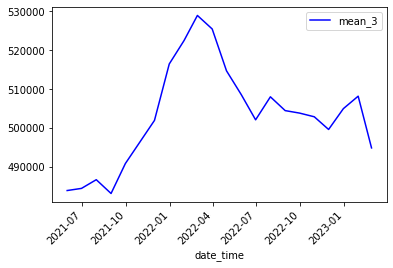

In [ ]:
# Courbe de la moyenne mobile trimestriel
CA_mois_sans_oct.plot(kind = 'line', x='date_time', y='mean_3', color = 'blue')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
print('Moyenne mobile par mois')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

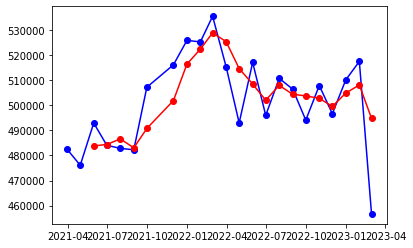

In [ ]:
plt.plot(CA_mois_sans_oct.date_time, CA_mois_sans_oct.price, color="blue", marker="o")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Chiffre d'affaire",color="blue",fontsize=14)
plt.plot(CA_mois_sans_oct.date_time, CA_mois_sans_oct.mean_3, color="red", marker="o")
ax2.set_ylabel("Moyenne mobile",color="red",fontsize=14)
plt.show

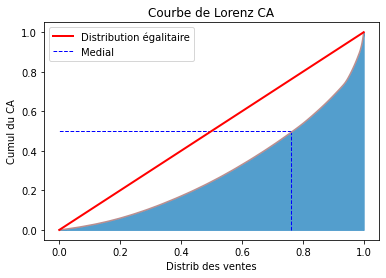

In [ ]:
# Courbe de lorenz représentant le chiffre d'affaires
import numpy as np

price = librairie['price'].values
courbe_lorenz = np.cumsum(np.sort(price))/price.sum()

plt.plot(np.linspace(0,1,len(courbe_lorenz)), courbe_lorenz, drawstyle= 'steps-post', color= 'rosybrown')
plt.fill_between(np.linspace(0,1,len(courbe_lorenz)), courbe_lorenz, color='#539ecd')
plt.plot([0,1],[0,1], 'r-', lw=2, label= 'Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle= '--', linewidth=1, label='Medial')
plt.hlines (xmin=.76, xmax=0, y=.5, color='blue', linestyle= '--', linewidth=1)

plt.title("Courbe de Lorenz CA")
plt.xlabel('Distrib des ventes')
plt.ylabel('Cumul du CA')
plt.legend(loc='best')

plt.show()

La courbe de Lorenz montre que 77% des ventes représentent 50% du CA. 
Cela s'explique par la typologie de livres achetés : 


*   Des livres accessibles à tout le monde (prix)
*   Des livres plus spécifiques et plus chers (purement scientifiques, phylosophique)



### **Informations par catégories**

In [ ]:
# Répartition des ventes par catégorie
Repart_ventes_ctx = librairie.groupby(['categ']).agg('price').count()
Repart_ventes_ctx.head()

categ
0    415459
1    227169
2     36483
Name: price, dtype: int64

Répartition des ventes par catégories


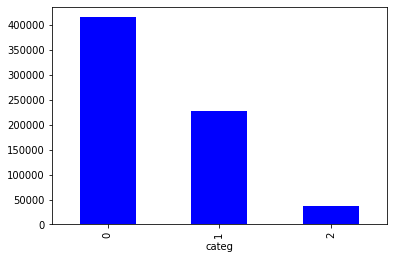

In [ ]:
# Représentation graphique de la répartition des ventes par catégorie
Repart_ventes_ctx.plot(kind='bar', x ='categ', y = 'price', color = 'blue')
print('Répartition des ventes par catégories')
plt.show()

In [ ]:
# Prix moyen par catégorie
print(librairie.groupby('categ')[['price']].mean())

           price
categ           
0      10.638188
1      20.485730
2      76.207412


In [ ]:
# Chiffre d'affaires par catégories de produit
CA_par_ctx = librairie.groupby(['categ']).agg({'price':sum}).reset_index()
CA_par_ctx.head()

,categ,price
0,0,4419730.97
1,1,4653722.69
2,2,2780275.02


Répartition du Chiffre d affaires par catégories


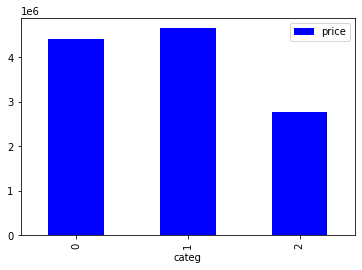

In [ ]:
# Histogramme représentant le chiffre d'affaires par catégories de produit
CA_par_ctx.plot(kind='bar', x ='categ', y = 'price', color = 'blue')
print('Répartition du Chiffre d affaires par catégories')
plt.show()

In [ ]:
# Reparition par références (top références)
top_reference = librairie[['id_prod','price']].groupby('id_prod').count()
top_reference.sort_values(by="price",ascending=False).head(3)

,price
id_prod,
1_369,2252
1_417,2189
1_414,2180


In [ ]:
# Reparition par références (flop références)
flop_reference = librairie[['id_prod','price']].groupby('id_prod').sum()
flop_reference.sort_values(by="price",ascending=True).head(3)

,price
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98


In [ ]:
# Reparition du nombre de références par catégorie
repart_ref_ctx = librairie.groupby(['categ']).agg('id_prod').count()
repart_ref_ctx.head()

categ
0    415459
1    227169
2     36483
Name: id_prod, dtype: int64

In [ ]:
# Chiffre d'affaires par références (produits)
librairie.groupby("id_prod")[["price"]].sum()

,price
id_prod,
0_0,4657.50
0_1,5352.13
0_10,394.90
0_100,61.80
0_1000,2954.88
...,...
2_95,395.96
2_96,28650.18
2_97,2092.87


#**Demandes de Julie**

### **Lien entre le genre de client & les catégories achetées**

**Le genre**

In [ ]:
# Répartition du chiffre d'affaires par genre
CA_par_sex_ctx = librairie.groupby(['sex']).agg({'price':sum}).reset_index()
CA_par_sex_ctx.head(3)

,sex,price
0,f,5859683.13
1,m,5994045.55


Répartition du chiffre d affaires par genre (f/m)


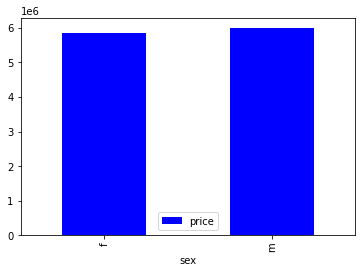

In [ ]:
# Représentation graphique de la répartition du chiffre d'affaires par genre
CA_par_sex_ctx.plot(kind = 'bar', x='sex', y='price', color = 'blue')
print('Répartition du chiffre d affaires par genre (f/m)')
plt.show()

### **Lien entre l’âge du client & le montant total des achats**

Age du client et montant de l'achat

In [ ]:
# Age réel des clients
librairie['age_client'] = 2022 - librairie['birth']
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth,age_client
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936,86
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936,86
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936,86
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936,86
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936,86


In [ ]:
# Age au moment de l'achat
librairie['age_client_achat'] = librairie['date_new_year_time'] - librairie['birth']
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth,age_client,age_client_achat
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936,86,85
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936,86,86
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936,86,86
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936,86,87
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936,86,86


In [ ]:
librairie['id_prod_new'] = librairie['id_prod'].str.slice(start=2)
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth,age_client,age_client_achat,id_prod_new
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936,86,85,1421
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936,86,86,1421
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936,86,86,1421
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936,86,87,1421
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936,86,86,1380


In [ ]:
# Montant total des achats par âge & Moyenne des achats par âge
montant_achat_par_age = librairie.groupby(['age_client']).agg({'price':['sum','mean']}).reset_index()
montant_achat_par_age.head()

age_client      price           
                    sum       mean
0         18  609013.69  40.201577
1         19  178195.78  40.767737
2         20  184177.35  40.178305
3         21  178497.70  41.979704
4         22  165007.98  37.391339

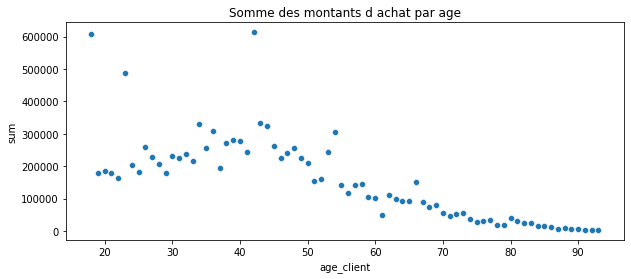

In [ ]:
# Graphique représentant le montant des achats vs l'age
import seaborn as sns
plt.figure (figsize=(10,4))
plt.title('Somme des montants d achat par age')
sns.scatterplot(data = montant_achat_par_age.sum, x = montant_achat_par_age.age_client, y = montant_achat_par_age.price['sum'])

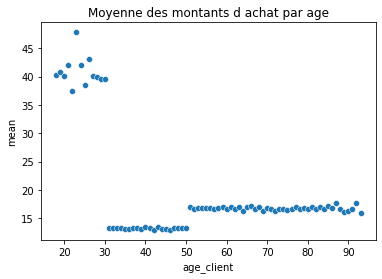

In [ ]:
plt.title('Moyenne des montants d achat par age')
sns.scatterplot(data = montant_achat_par_age, x = montant_achat_par_age.age_client, y = montant_achat_par_age.price['mean'])

Fréquence d'achat des clients

In [ ]:
# Correlation entre l’age et la frequence d'achat des clients
frequence_achat = librairie.groupby('age_client').count().reset_index()

frequence = frequence_achat[['age_client', 'price']]

frequence['df_frequence'] = frequence['price']/sum(frequence['price'])
frequence.sort_values(by='age_client', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age_client,price,df_frequence
75,93,201,0.000296
74,92,226,0.000333
73,91,170,0.000250
72,90,311,0.000458
71,89,326,0.000480
...,...,...,...
4,22,4413,0.006498
3,21,4252,0.006261
2,20,4584,0.006750
1,19,4371,0.006436


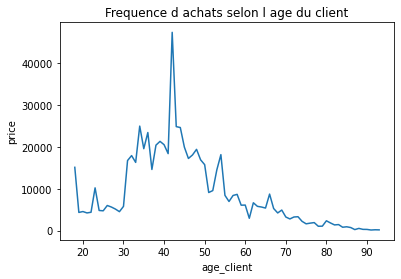

In [ ]:
# Graphique représentant la frequence d'achat
plt.title('Frequence d achats selon l age du client')
sns.lineplot(x=frequence.age_client, y=frequence.price)

<function matplotlib.pyplot.show(*args, **kw)>

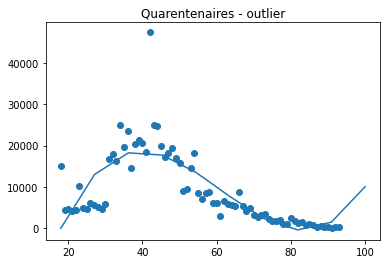

In [ ]:
# Graph representant la frequence d'achat des quarentenaires (outlier identifié)

x = frequence.age_client
y = frequence.price

mymodel = np.poly1d(np.polyfit(x,y,3))

myline = np.linspace(18,100,10)

plt.title('Quarentenaires - outlier')
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show

Outlier qui peut  s’expliquer par le coût des livres plus élevé.

Montant des achats par intervalle d’âge

In [ ]:
# Fonction pour calculer les intervalles d’ages avec def (exemple)

def ageIntervale(age_client):
    if age_client < 12:
      return '[-12ans]'
    elif age_client >= 12 and age_client < 17:
      return '[12-17ans]'
    elif age_client >= 18 and age_client < 24:
      return '[18-24ans]'
    elif age_client >= 25 and age_client < 39:
      return '[25-39ans]'
    elif age_client >= 40 and age_client < 59:
      return '[40-59ans]'
    elif age_client >= 60 and age_client < 69:
      return '[60-69ans]'
    elif age_client >= 70:
      return '[+70ans]'
librairie['Intervalle'] = librairie.age_client.apply(ageIntervale)
librairie.head()

,id_prod,price,categ,date_time,date,session_id,client_id,date_new,date_new_year,date_new_month,date_new_day,date_new_year_time,sex,birth,age_client,age_client_achat,id_prod_new,Intervalle
0,0_1421,19.99,0,2021-03-01,2021-03-01 15:07:42.730079,s_317,c_8024,2021-03-01,2021,03,01,2021,f,1936,86,85,1421,[+70ans]
1,0_1421,19.99,0,2022-10-01,2022-10-01 15:07:42.730079,s_276259,c_8024,2022-10-01,2022,10,01,2022,f,1936,86,86,1421,[+70ans]
2,0_1421,19.99,0,2022-12-01,2022-12-01 15:07:42.730079,s_305607,c_8024,2022-12-01,2022,12,01,2022,f,1936,86,86,1421,[+70ans]
3,0_1421,19.99,0,2023-01-01,2023-01-01 15:07:42.730079,s_320469,c_8024,2023-01-01,2023,01,01,2023,f,1936,86,87,1421,[+70ans]
4,0_1380,7.45,0,2022-01-23,2022-01-23 12:17:49.364339,s_154021,c_8024,2022-01-23,2022,01,23,2022,f,1936,86,86,1380,[+70ans]


In [ ]:
# Chiffre d'affaires par âge 
Somme_montant_age = librairie.groupby(['age_client']).agg({'price':sum}).reset_index()
Somme_montant_age.head()

,age_client,price
0,18,609013.69
1,19,178195.78
2,20,184177.35
3,21,178497.70
4,22,165007.98


In [ ]:
# Création d'intervalles d’âge (bins) avec pd.cut
tranche = [17, 40, 60, 100]
df_intervalle = ['<40', '40-60ans', '>60ans']
Somme_montant_age['bins'] = pd.cut(Somme_montant_age['age_client'], bins=tranche, labels=df_intervalle)
Somme_montant_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age_client  76 non-null     int64   
 1   price       76 non-null     float64 
 2   bins        76 non-null     category
dtypes: category(1), float64(1), int64(1)
memory usage: 1.5 KB


In [ ]:
# Chriffre d'affaires par intervalle d'âges
CA_par_intervalle_age = Somme_montant_age.groupby(['bins']).agg({'price':sum}).reset_index()
CA_par_intervalle_age.head()

,bins,price
0,<40,5894071.07
1,40-60ans,4551570.52
2,>60ans,1408087.09


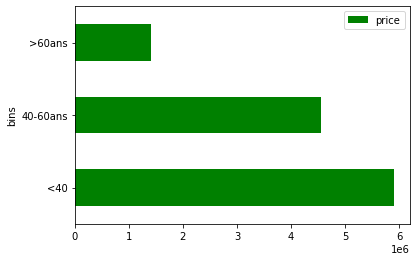

In [ ]:
# Graphique représentant le chriffre d'affaires par intervalle d'âges (histogramme)
CA_par_intervalle_age.plot(kind = 'barh', x='bins', y='price', color ='green')
plt.show()

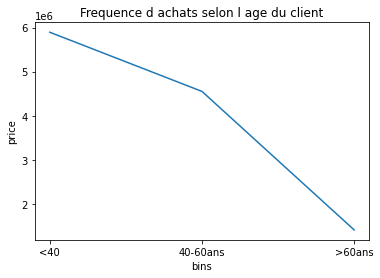

In [ ]:
# Graphique représentant le chriffre d'affaires par intervalle d'âges (lineplot)
plt.title('Frequence d achats selon l age du client')
sns.lineplot(x=CA_par_intervalle_age.bins, y=CA_par_intervalle_age.price)

Montant total par catégories et l'age

In [ ]:
# Lien entre le montant total par catégories et l’age
age_client_ctx = librairie[['categ','age_client', 'price']].groupby(['age_client', 'categ']).count()
age_client_ctx.head()

price
age_client categ       
18         0       3418
           1       5719
           2       6012
19         0        909
           1       1678

Chiffre d'affaires par client + Chiffre d'affaires total

In [ ]:
# Calcule du CA total
TT_CA = librairie['price'].sum()
print(round(TT_CA,2))

# Enlever les chaînes de caractères sur client_id
TT_clients = librairie['client_id'].count()
print(TT_clients)

11853728.68
679111


In [ ]:
# Répartition du chiffre d'affaires par client
repart_CA_client = librairie.groupby("client_id")[["price"]].sum()
repart_CA_client.head()

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


Panier moyen

In [ ]:
# Calcule du panier moyen
panier_moyen_client = TT_CA/TT_clients
f"La taille du panier moyen est de: {panier_moyen_client:.2f}€"

'La taille du panier moyen est de: 17.45€'

In [ ]:
# Montant du panier par age
panier_client_age = librairie.groupby(['age_client', 'client_id']).count()
panier = panier_client_age.groupby('age_client').mean().reset_index()
panier_age = panier[['age_client', 'price']]
panier_age.head()

,age_client,price
0,18,34.665904
1,19,30.144828
2,20,31.613793
3,21,34.016000
4,22,32.448529


# **PART 2 : Analyse bivariée**

Réaliser une analyse bivariée entre les variables suivantes :



*   Genre du client et catégorie ✅ > Khi2
*   Âge des clients et montant total des achats ✅ > Anova
*   Âge des clients et catégorie de produits achetés ✅ > Shapiro-Wilk
*   Âge des clients et fréquence d’achat ✅ > Regression linéaire
*   Âge des clients et panier moyen ✅ > Pearson













In [ ]:
correlation = librairie.corr()
correlation

,price,categ,date_new_year_time,birth,age_client,age_client_achat
price,1.000000,0.671752,0.014201,0.209465,-0.209465,-0.208578
categ,0.671752,1.000000,0.033502,0.099241,-0.099241,-0.097604
date_new_year_time,0.014201,0.033502,1.000000,-0.002647,0.002647,0.048083
birth,0.209465,0.099241,-0.002647,1.000000,-1.000000,-0.998967
age_client,-0.209465,-0.099241,0.002647,-1.000000,1.000000,0.998967
age_client_achat,-0.208578,-0.097604,0.048083,-0.998967,0.998967,1.000000


Text(0.5, 1.0, 'Heatmap de corrélation globale')

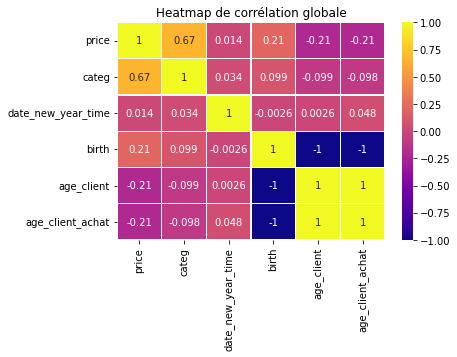

In [ ]:
df_heatmap = correlation
sns.heatmap(df_heatmap, annot = True, cmap='plasma', linewidths=0.1)

plt.title('Heatmap de corrélation globale')

### KHI2 - Test entre deux variables qualitatives - Genre & catégorie


In [ ]:
# Définition des hypothèses : 
# H0 : Le genre du client est independant des categories.
# H1 : Le genre du client est associé/corrélé aux categories.

#L'hypothèse alternative notée H1 est la "négation" de H0, elle est équivalente à dire « H0 est fausse ». 
#La décision de rejeter H0 signifie que H1 est réalisée ou H1 est vraie.

In [ ]:
# Utilisation du module stats. 
# La fonction "chi2_contingency()"" calcule la statistique de khi2 et pvaleur pour le test d'hypothèse
# d'independance des fréquences observées dans le tableau de contingence

In [ ]:
# Creation du tableau de contigence via un crosstab
cont_tab =pd.crosstab(librairie['sex'],librairie['categ'], margins = True)
cont_tab.head()

categ,0,1,2,All
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
All,415459,227169,36483,679111


Text(33.0, 0.5, 'categ')

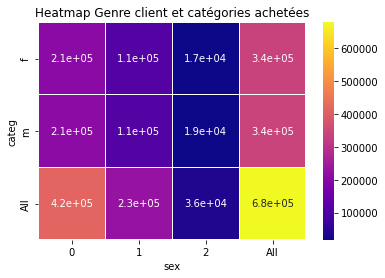

In [ ]:
khi2_heatmap = cont_tab
sns.heatmap(khi2_heatmap, annot = True, cmap='plasma', linewidths=0.1)

plt.title('Heatmap Genre client et catégories achetées')
plt.xlabel('sex')
plt.ylabel('categ')

In [ ]:
# On calcul khi2 = st_chi2
# Vérifier si les valeurs sont corrélées, nous devons passer une étape supplementaire appelée "seuil de significativité"
# La Pvalue : l'unique valeur nécessaire pour prendre notre décision = st_p
# Nombre de degrés de liberté = st_dof
# Le tableau des fréquences attendues = st_exp

from scipy import stats

st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(cont_tab)

st_chi2, st_p, st_dof, st_exp


(147.11906816131497,
 3.144522803251581e-29,
 6,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ,
         338285.        ],
        [208506.75240719, 114009.49416811,  18309.7534247 ,
         340826.        ],
        [415459.        , 227169.        ,  36483.        ,
         679111.        ]]))

In [ ]:
if st_p < 0.05:
  print("On rejette H0")
else: 
  print("On accepte H1")

On rejette H0


**Test au seuil de 1%**

Dans notre cas, la pvaleur obtenue par notre échantillon est de 1.1310980597090762e-32, ce qui est au-dessous du seuil fixé. 
On peut donc rejetter l’hypothèse H0. 
Les variables « genre » et « catégories » sont dépendantes. Il y a une légère corrélation confirmée.

Le Khi2 est de : 147.11906816131497


Text(33.0, 0.5, 'categ')

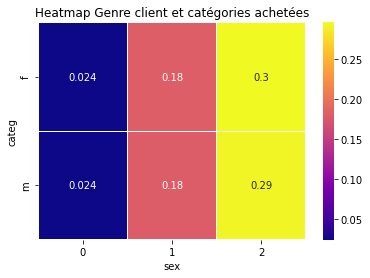

In [ ]:
# BONUS 
# Test de Khi2 - Calculé à la main 
#H0 = pas de correlation --> variables indépendantes
#H1 = correlation

# Definir les matrices
x = 'sex'
y = 'categ'

# Creation du tableau de contigence via un crosstab
tab_contingence = librairie[[x,y]].pivot_table(index = x, columns= y, aggfunc=len).fillna(0).copy().astype(int)
tx =librairie[x].value_counts()
ty =librairie[y].value_counts()

# Matrice des valeurs attendues (frequence que l'on devrait trouver dans une cellule)

tx_df = pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ['']
ty_df.columns = ['']

#Valeur totales dans le dateframe
n = len(librairie)

# Cas d'independance
indep = (tx_df.dot(ty_df.T)/n)
indep

# Ici, on regarde l’écart observé et ce qui est attendu. Ici on voit très peu d’écart mais on va calculer le khi2
mesure = (tab_contingence-indep)**2/indep
mesure

# Pour tester l'hypothèse afin de déterminer si les données sont conformes aux attentes. 
# L'idée de base qui sous-entend le test est de comparer les valeurs observées dans les données aux valeurs attendues si l'hypothèse nulle est vraie.

Resultat_khi2_par_ctx = mesure.sum()
Resultat_khi2_par_ctx

# Resultat élevé
# plus la différence entre les effectifs de cellules observés et théoriques est importante, 
# et plus il apparaît que les proportions de colonne ne sont pas égales, que l'hypothèse d'indépendance est incorrecte 
Resultat_khi2_TT = mesure.sum().sum()
print(f"Le Khi2 est de : {Resultat_khi2_TT}")

# Graph heatmap

df_heatmap = (mesure/Resultat_khi2_TT)
sns.heatmap(df_heatmap, annot = True, cmap='plasma', linewidths=0.1)

plt.title('Heatmap Genre client et catégories achetées')
plt.xlabel('sex')
plt.ylabel('categ')

### ANOVA - Analyse de la variance - Montant achat & Âge
https://www.reneshbedre.com/blog/anova.html

In [ ]:
# Définition des hypothèses : 
# H0 : L'âge du client est independant au montant d'achat d'un client.
# H1 : L'âge du client est associé/corrélé au montant d'achat d'un client.

In [ ]:
CA_par_intervalle_age = Somme_montant_age.groupby(['bins']).agg({'price':sum}).reset_index()
CA_par_intervalle_age.head()

,bins,price
0,<40,5894071.07
1,40-60ans,4551570.52
2,>60ans,1408087.09


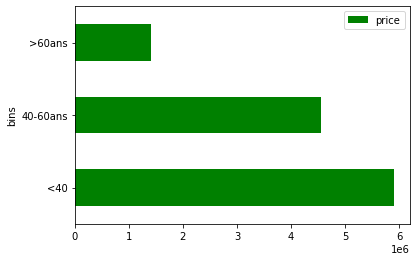

In [ ]:
CA_par_intervalle_age.plot(kind = 'barh', x='bins', y='price', color ='green')
plt.show()

In [ ]:
montant_achat_par_age = librairie.groupby(['age_client']).agg({'price':['sum','mean']}).reset_index()
montant_achat_par_age.head()

age_client      price           
                    sum       mean
0         18  609013.69  40.201577
1         19  178195.78  40.767737
2         20  184177.35  40.178305
3         21  178497.70  41.979704
4         22  165007.98  37.391339

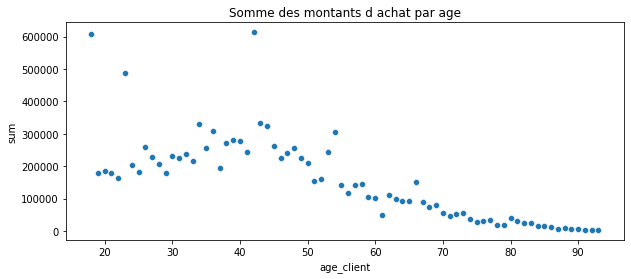

In [ ]:
# Graph représentant le montant des achats vs l'age
import seaborn as sns
plt.figure (figsize=(10,4))
plt.title('Somme des montants d achat par age')
sns.scatterplot(data = montant_achat_par_age.sum, x = montant_achat_par_age.age_client, y = montant_achat_par_age.price['sum'])

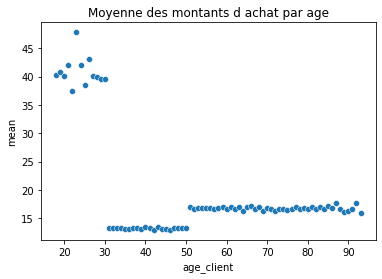

In [ ]:
plt.title('Moyenne des montants d achat par age')
sns.scatterplot(data = montant_achat_par_age, x = montant_achat_par_age.age_client, y = montant_achat_par_age.price['mean'])

In [ ]:
# Test de comparaison (paramétrique ou non paramétrique en fonction des hypothèses) 
# a été réalisé pour vérifier la corrélation entre une variable quantitative et une variable qualitative

from scipy.stats import f_oneway
fvalue, pvalue = stats.f_oneway(montant_achat_par_age['price']['mean'],montant_achat_par_age['age_client'])
print(fvalue, pvalue)
# ici c'est la p value

if pvalue < 0.05:
  print("On rejette H0")
else: 
  print("On accepte H1")


164.9117945073538 6.2194576635233e-26
On rejette H0


Les clients jeunes (18 - 30 ans) ont tendance à acheter des produits plus chers.

### Shapiro - Tester la normalité d'une distribution (Âge & Catégorie)

In [ ]:
# Définition des hypothèses : 
# H0 : Les variables âge et catégorie ont une distribution normale. 
# H1 : Les variables âge et catégorie n'ont pas une distribution normale. 

In [ ]:
# Lien entre le montant total par catégories et l’age
age_client_ctx = librairie[['categ','age_client', 'price']].groupby(['age_client', 'categ']).count()
age_client_ctx.head(100)

price
age_client categ       
18         0       3418
           1       5719
           2       6012
19         0        909
           1       1678
...                 ...
49         2         76
50         0      11877
           1       3849
           2         64
51         0       3955

[100 rows x 1 columns]

In [ ]:
from scipy import stats
rng = np.random.default_rng()
x = age_client_ctx
shapiro_test = stats.shapiro(x)
shapiro_test

ShapiroResult(statistic=0.6345548629760742, pvalue=8.189399064798248e-22)

In [ ]:
fvalue, pvalue = shapiro_test

if pvalue < 0.05:
  print("On rejette H0")
else: 
  print("On accepte H1")


On rejette H0


Nous ne pouvons pas raisonnablement retenir l’hypothèse d'une distribution normale.

### Regression linéaire - Test entre deux variables quantitatives (Age & Frequence d'achat)

In [ ]:
# Définition des hypothèses : 
# H0 : La fréquence d'achat est liée à l’âge
# H1 : La fréquence d'achat n'est pas liée à l’âge

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
rng = np.random.default_rng()

In [ ]:
# Correlation entre l’age et la frequence d'achat des clients
frequence_achat = librairie.groupby('age_client').count().reset_index()

frequence = frequence_achat[['age_client', 'price']]

frequence['df_frequence'] = frequence['price']/sum(frequence['price'])
frequence.sort_values(by='age_client', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age_client,price,df_frequence
75,93,201,0.000296
74,92,226,0.000333
73,91,170,0.000250
72,90,311,0.000458
71,89,326,0.000480
...,...,...,...
4,22,4413,0.006498
3,21,4252,0.006261
2,20,4584,0.006750
1,19,4371,0.006436


In [ ]:
x = frequence['df_frequence']
y = frequence['age_client']
slope, intercept, r, p, se = stats.linregress(x, y)

print(f"R-squared: {r**2:.6f}")

def predict(x):
  return slope * x + intercept

R-squared: 0.284872


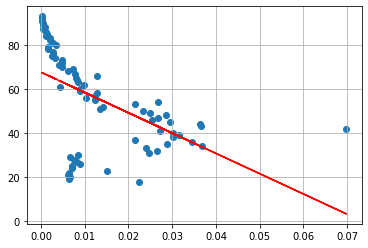

In [ ]:
axes = plt.axes()
axes.grid()

plt.scatter(x,y)

fitline = predict(x)
plt.plot(x, fitline,'r', label='linegress')
plt.show()

In [ ]:
pearson_age_freq = stats.pearsonr(frequence.age_client, frequence.price)
pearson_age_freq 

(-0.5337344271238335, 6.876677470343433e-07)

Il y a une corrélation négative entre la fréquence d'achat et l’âge, en effet, quand l’âge augmente la fréquence d'achat diminue et vice versa (quand l’age diminue, la fréquence d'achat augmente).

### PEARSON (test paramétrique) - Âge des clients & panier moyen 

In [ ]:
# Montant du panier par age
panier_client_age = librairie.groupby(['age_client', 'client_id']).count()
panier = panier_client_age.groupby('age_client').mean().reset_index()
panier_moy_age = panier[['age_client', 'price']]
panier_moy_age.head()

,age_client,price
0,18,34.665904
1,19,30.144828
2,20,31.613793
3,21,34.016000
4,22,32.448529


Panier moyen VS l âge


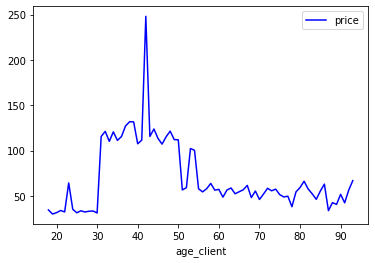

In [ ]:
panier_moy_age.plot(kind='line', x ='age_client', y = 'price', color = 'blue')
print('Panier moyen VS l âge')
plt.show()

Nous constatons qu'il y a une une tendance qui se dégage à 40 ans. 

In [ ]:
# Y'a t-il une corrélation entre l’âge des clients et le panier moyen ? 
# H0 nulle = la panier moyen n'est pas corrélé à l'âge du client
# H1 alternative =  la panier moyen est corrélé à l'âge du client

# Utilisation du test de pearson, qui va tester la corrélation entre deux variables.

In [ ]:
pearson_age_panier_moy = stats.pearsonr(panier_moy_age.age_client, panier_moy_age.price)
pearson_age_panier_moy 

(-0.23444679764336454, 0.041500711926016925)

Nous rejettons H0, l'âge est corrélé avec le panier moyen client.